# Logistic Regression
This notebook has some experiments of the Logistic Regression methods implemented in logistic_regression.py. Some parts of the experiments are based on Programming Exercise 2 of course Machine Learning on Coursera.

#### Imports

In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 1
%aimport logistic_regression
%aimport util

## Logistic regression

> "Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.
Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams."

### Loading the dataset

In [3]:
df = pd.read_csv('data/ex2data1.txt', sep=',', header=None)
df.columns = ['exam_score_1', 'exam_score_2', 'label']

### Data analysis and visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
exam_score_1    100 non-null float64
exam_score_2    100 non-null float64
label           100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


* 100 examples
* Exams features of type float and label of type int
* No missing values

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
exam_score_1,100.0,65.644274,19.458222,30.058822,50.919511,67.032988,80.212529,99.827858
exam_score_2,100.0,66.221998,18.582783,30.603263,48.179205,67.682381,79.360605,98.869436
label,100.0,0.600000,0.492366,0.000000,0.000000,1.000000,1.000000,1.000000


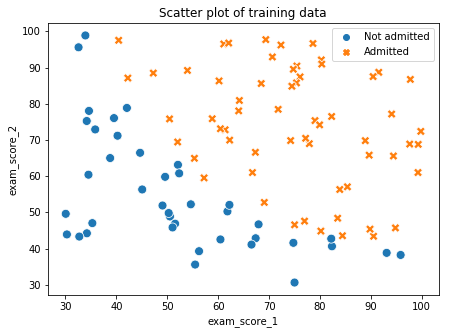

In [6]:
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x='exam_score_1', y='exam_score_2', hue='label', data=df, style='label', s=80)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:], ['Not admitted', 'Admitted'])
plt.title('Scatter plot of training data')
plt.show(ax)

The plot shows that the admitted and not admitted students can be separated by a straight-line

### Fit and Predict Logistic Regression

In [7]:
model = logistic_regression.fit(df[['exam_score_1', 'exam_score_2']].values, df.label)
model['theta']

array([-25.16131861,   0.20623159,   0.20147149])

#### Decision boundary

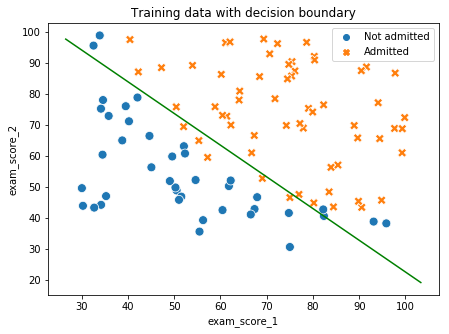

In [8]:
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x='exam_score_1', y='exam_score_2', hue='label', data=df, style='label', s=80)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:], ['Not admitted', 'Admitted'])
plt.title('Training data with decision boundary')

plot_x = np.array(ax.get_xlim())
plot_y = (-1/model['theta'][2]*(model['theta'][1]*plot_x + model['theta'][0]))
plt.plot(plot_x, plot_y, '-', c="green")
plt.show(ax)

#### Predict whether a particular student will be admitted

In [9]:
prob = logistic_regression.sigmoid(np.array([1, 45, 85]).dot(model['theta']))
f'For a student with scores 45 and 85, we predict an admission probability of {prob}'

'For a student with scores 45 and 85, we predict an admission probability of 0.7762906234985698'

#### Accuracy on training set

In [10]:
y_pred_prob = logistic_regression.predict(df[['exam_score_1', 'exam_score_2']].values, model)
f'Train accuracy: {np.mean(y_pred_prob == df.label.values) * 100}'

'Train accuracy: 89.0'

## Regularized Logistic Regression

> "Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected."

### Loading the dataset

In [11]:
df2 = pd.read_csv('data/ex2data2.txt', sep=',', header=None)
df2.columns = ['test_1', 'test_2', 'label']

### Data analysis and visualization

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
test_1    118 non-null float64
test_2    118 non-null float64
label     118 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.8 KB


* 118 examples
* Microchip tests features of type float and label of type int
* No missing values

In [13]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
test_1,118.0,0.054779,0.496654,-0.83007,-0.372120,-0.006336,0.478970,1.0709
test_2,118.0,0.183102,0.519743,-0.76974,-0.254385,0.213455,0.646562,1.1089
label,118.0,0.491525,0.502060,0.00000,0.000000,0.000000,1.000000,1.0000


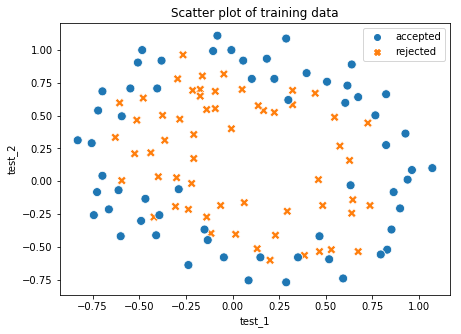

In [14]:
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x='test_1', y='test_2', hue='label', data=df2, style='label', s=80)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:], ['accepted', 'rejected'])
plt.title('Scatter plot of training data')
plt.show(ax)

The plot shows that the accepted and rejects tests cannot be separated by a straight-line, so straight-forward application of logistic regressino will not perform well on this dataset.

### Feature mapping (Feature engineering)
> "One way to fit the data better is to create more features from each data point. We will map the features into all polynomial terms of x1 and x2 up to the sixth power."

In [15]:
X = util.map_feature(df2.test_1.values, df2.test_2.values)
X.shape

(118, 28)

### Fit and Predict Regularized Logistic Regression

In [16]:
model = logistic_regression.fit(X[:,1:], df2.label, 1)
model['theta']

array([ 1.27271028,  0.62529966,  1.18111687, -2.01987398, -0.9174319 ,
       -1.4316693 ,  0.12393227, -0.36553117, -0.35725401, -0.17516291,
       -1.4581701 , -0.05098418, -0.61558546, -0.27469165, -1.19271296,
       -0.2421784 , -0.2060329 , -0.04466179, -0.27778957, -0.29539513,
       -0.45645982, -1.04319157,  0.02779373, -0.29244879,  0.01555762,
       -0.32742409, -0.14389151, -0.92467486])

#### Decision boundary

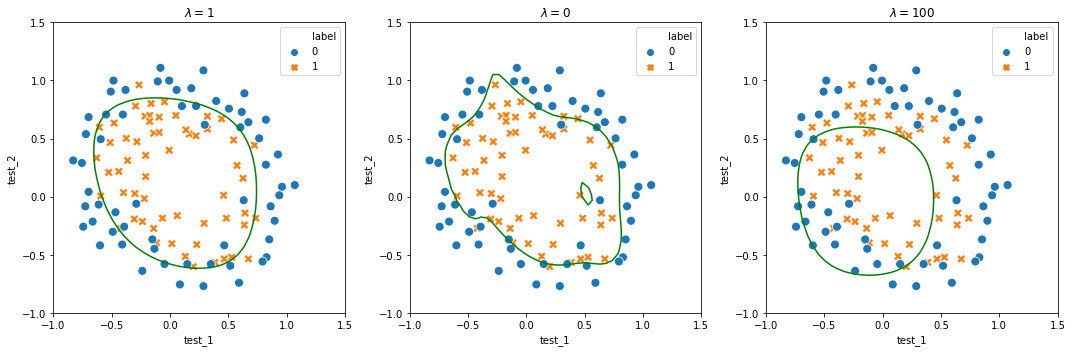

In [17]:
lambda_reg = [1, 0, 100]
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)

for il, l in enumerate(lambda_reg):
    model_l = logistic_regression.fit(X[:,1:], df2.label, l)

    z = np.zeros((u.shape[0], v.shape[0]))
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = util.map_feature(u[i], v[j]).dot(model_l['theta'])
    
    sns.scatterplot(x='test_1', y='test_2', hue='label', data=df2, style='label', s=80, ax=axs[il])
    
    axs[il].contour(u, v, z.T, levels=[0], colors='green')
    axs[il].set_title('$\lambda={}$'.format(l))
fig.tight_layout()
plt.show()

#### Accuracy on training set

In [18]:
y_pred_prob = logistic_regression.predict(X[:,1:], model)
f'Train accuracy: {np.mean(y_pred_prob == df2.label.values) * 100}'

'Train accuracy: 83.05084745762711'